In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('D:\Python_Solution\Weather_project\Weather_Model_website\Data\weather.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Dell\AppData\Local\Temp\ipykernel_16608\3838376174.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('D:\Python_Solution\Weather_project\Weather_Model_website\Data\weather.csv')


,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,2009-01-01
1,Bac Lieu,31,25,20,ENE,0.0,64,24,1010,2010-01-01
2,Bac Lieu,29,24,14,E,0.0,75,45,1008,2011-01-01
3,Bac Lieu,30,24,30,E,0.0,79,52,1012,2012-01-01
4,Bac Lieu,31,25,20,ENE,0.0,70,24,1010,2013-01-01


(array([1.65989157e-02, 1.39327944e-04, 1.88903628e-05, 6.17392344e-06,
        2.76444333e-06, 5.52888666e-07, 1.84296222e-07, 1.84296222e-07,
        9.21481111e-08, 1.84296222e-07]),
 array([  0.  ,  59.64, 119.28, 178.92, 238.56, 298.2 , 357.84, 417.48,
        477.12, 536.76, 596.4 ]),
 <BarContainer object of 10 artists>)

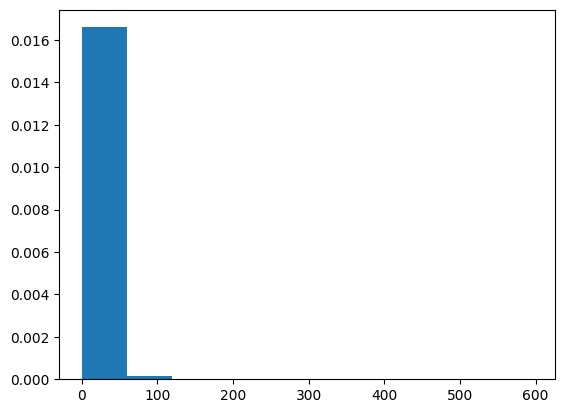

In [4]:
plt.hist(df['rain'], density = True, bins= 10)


In [5]:
df = df[df['rain'] < 100]

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
max,181477.0,29.848262,4.570772,4.0,28.0,31.0,33.0,46.0
min,181477.0,23.278377,3.947801,2.0,21.0,24.0,26.0,32.0
wind,181477.0,11.018575,5.281009,1.0,7.0,10.0,14.0,50.0
rain,181477.0,6.174743,10.806448,0.0,0.1,1.8,7.5,99.6
humidi,181477.0,77.045251,9.268962,23.0,71.0,78.0,83.0,100.0
cloud,181477.0,41.606187,23.788149,0.0,23.0,38.0,58.0,100.0
pressure,181477.0,1010.238769,4.629272,991.0,1008.0,1010.0,1012.0,1038.0


In [7]:
df = df.sort_values(['province', 'date'],ascending = True)

In [8]:
df.isnull().sum()

province    0
max         0
min         0
wind        0
wind_d      0
rain        0
humidi      0
cloud       0
pressure    0
date        0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.head()

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,2009-01-01
117,Bac Lieu,28,22,15,ENE,0.5,85,61,1010,2009-01-02
91,Bac Lieu,23,21,9,ESE,16.7,91,77,1011,2009-01-03
104,Bac Lieu,27,21,9,E,2.2,86,32,1011,2009-01-04
39,Bac Lieu,29,22,10,SE,0.0,81,25,1010,2009-01-05


In [22]:
df = df.drop(['wind_d'], axis=1 )

In [45]:
le = LabelEncoder()

label = le.fit_transform(df['wind_d'])

df.drop("wind_d", axis=1, inplace=True)

df['wind_d'] = label

In [46]:
province = set(df.province)

In [12]:
df = df.drop(['date'], axis = 1)
df

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010
117,Bac Lieu,28,22,15,ENE,0.5,85,61,1010
91,Bac Lieu,23,21,9,ESE,16.7,91,77,1011
104,Bac Lieu,27,21,9,E,2.2,86,32,1011
39,Bac Lieu,29,22,10,SE,0.0,81,25,1010
...,...,...,...,...,...,...,...,...,...
161410,Yen Bai,32,23,6,ESE,7.3,79,71,1001
161307,Yen Bai,34,25,6,SSE,0.3,71,46,999
161333,Yen Bai,36,27,6,SW,0.0,64,29,1000
161346,Yen Bai,37,28,7,S,0.0,66,27,1002


In [13]:
df.max().to_frame().T

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure
0,Yen Bai,46,32,50,WSW,99.6,100,100,1038


In [14]:
df.min().to_frame().T

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure
0,Bac Lieu,4,2,1,E,0.0,23,0,991


In [15]:
feats = ['max', 'min', 'wind','humidi','cloud','pressure']

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[feats+['rain']])

MinMaxScaler()

In [17]:
df[feats+['rain_norm']] = scaler.transform(df[feats + ['rain']])


In [18]:
df[feats]

,max,min,wind,humidi,cloud,pressure
0,0.547619,0.666667,0.326531,0.870130,0.71,0.404255
117,0.571429,0.666667,0.285714,0.805195,0.61,0.404255
91,0.452381,0.633333,0.163265,0.883117,0.77,0.425532
104,0.547619,0.633333,0.163265,0.818182,0.32,0.425532
39,0.595238,0.666667,0.183673,0.753247,0.25,0.404255
...,...,...,...,...,...,...
161410,0.666667,0.700000,0.102041,0.727273,0.71,0.212766
161307,0.714286,0.766667,0.102041,0.623377,0.46,0.170213
161333,0.761905,0.833333,0.102041,0.532468,0.29,0.191489
161346,0.785714,0.866667,0.122449,0.558442,0.27,0.234043


In [23]:
df

,province,max,min,wind,rain,humidi,cloud,pressure,rain_norm
0,Bac Lieu,0.547619,0.666667,0.326531,6.9,0.870130,0.71,0.404255,0.069277
117,Bac Lieu,0.571429,0.666667,0.285714,0.5,0.805195,0.61,0.404255,0.005020
91,Bac Lieu,0.452381,0.633333,0.163265,16.7,0.883117,0.77,0.425532,0.167671
104,Bac Lieu,0.547619,0.633333,0.163265,2.2,0.818182,0.32,0.425532,0.022088
39,Bac Lieu,0.595238,0.666667,0.183673,0.0,0.753247,0.25,0.404255,0.000000
...,...,...,...,...,...,...,...,...,...
161410,Yen Bai,0.666667,0.700000,0.102041,7.3,0.727273,0.71,0.212766,0.073293
161307,Yen Bai,0.714286,0.766667,0.102041,0.3,0.623377,0.46,0.170213,0.003012
161333,Yen Bai,0.761905,0.833333,0.102041,0.0,0.532468,0.29,0.191489,0.000000
161346,Yen Bai,0.785714,0.866667,0.122449,0.0,0.558442,0.27,0.234043,0.000000


In [24]:
output = 'D:\Python_Solution\Weather_project\Weather_Model_website\Data\Data_For_model\dataset_for_RNN.csv'
df.to_csv(output,index=False)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Dell\AppData\Local\Temp\ipykernel_16608\2234656859.py:1: SyntaxWarning: invalid escape sequence '\P'
  output = 'D:\Python_Solution\Weather_project\Weather_Model_website\Data\Data_For_model\dataset_for_RNN.csv'
